# Naive Bayes for Spam Detection

### Group: da Unkabogables
* Kyla Ronquillo
* Jasper Gomez
* Maxine Nicole Bernales
* John Michael Coronelnel

In [1]:
# import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Load the dataset with specified encoding
df_train = pd.read_csv('/kaggle/input/spam-or-ham/TrainingData.csv', encoding='ISO-8859-1')
df_train.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Prepare data
emails = df_train['message']
labels = df_train['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [4]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english', lowercase=True, max_features=5000)

In [5]:
# Transform the emails
X_train = vectorizer.fit_transform(emails)
X_train.shape

(3900, 5000)

In [6]:
# Split data into train and test sets
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_train, labels, test_size=0.2, random_state=42)

In [7]:
# Train Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_data, y_train_data)

MultinomialNB()

In [8]:
# Predict on the test set
y_pred = nb_model.predict(X_test_data)

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test_data, y_pred)
report = classification_report(y_test_data, y_pred, target_names=['ham', 'spam'])

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.985897435897436
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       687
        spam       0.93      0.96      0.94        93

    accuracy                           0.99       780
   macro avg       0.96      0.97      0.97       780
weighted avg       0.99      0.99      0.99       780



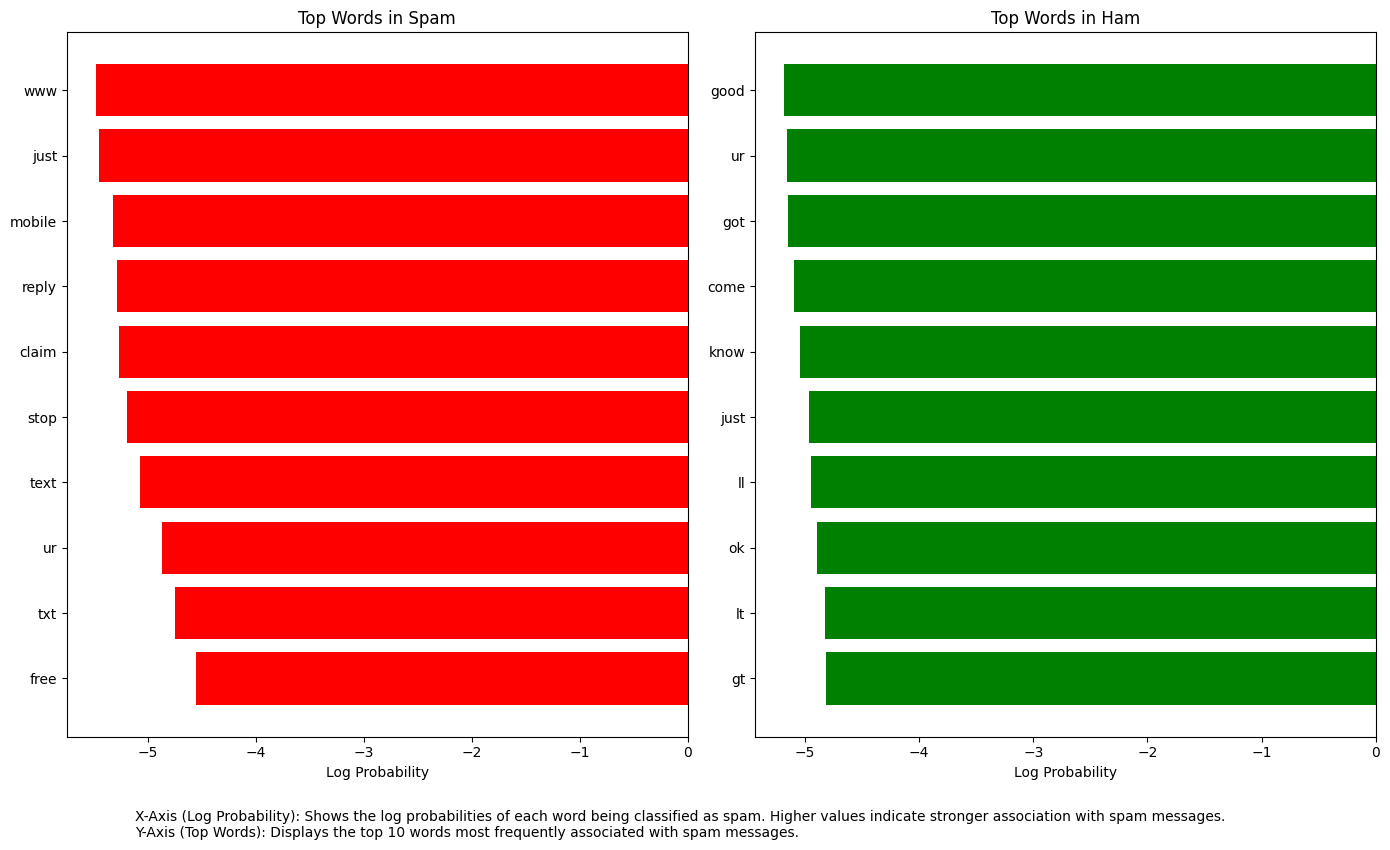

In [10]:
# Visualize word frequency in spam versus ham
def plot_word_frequencies_with_explanation(vectorizer, model, n_words=10):
    # Extract feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()
    # Log probabilities for each class (spam and ham)
    spam_probabilities = model.feature_log_prob_[1]  # Spam class log probabilities
    ham_probabilities = model.feature_log_prob_[0]   # Ham class log probabilities

    # Get the top words for spam and ham
    spam_top_indices = spam_probabilities.argsort()[-n_words:][::-1]
    ham_top_indices = ham_probabilities.argsort()[-n_words:][::-1]

    # Plot the words and their log probabilities
    plt.figure(figsize=(14, 8))  # Increased height for text

    # Spam visualization
    plt.subplot(1, 2, 1)
    plt.barh(range(n_words), spam_probabilities[spam_top_indices], align='center', color='red')
    plt.yticks(range(n_words), [feature_names[i] for i in spam_top_indices])
    plt.xlabel('Log Probability')
    plt.title('Top Words in Spam')

    # Ham visualization
    plt.subplot(1, 2, 2)
    plt.barh(range(n_words), ham_probabilities[ham_top_indices], align='center', color='green')
    plt.yticks(range(n_words), [feature_names[i] for i in ham_top_indices])
    plt.xlabel('Log Probability')
    plt.title('Top Words in Ham')

    # Add explanatory text below the plots
    explanation_text = (
        "X-Axis (Log Probability): Shows the log probabilities of each word being classified as spam. "
        "Higher values indicate stronger association with spam messages.\n"
        "Y-Axis (Top Words): Displays the top 10 words most frequently associated with spam messages."
    )
    plt.figtext(0.1, -0.05, explanation_text, wrap=True, horizontalalignment='left', fontsize=10)

    plt.tight_layout()
    plt.show()

plot_word_frequencies_with_explanation(vectorizer, nb_model)


In [11]:
# visualize spam vs ham pie chart distribution
colors = ['#FF6F61', '#6EC177'] 

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    [spam_count, ham_count],
    labels=['Spam', 'Ham'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 12, 'weight': 'bold'},
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'black'}
)

# Style percentage text
for autotext in autotexts:
    autotext.set_color('white') 
    autotext.set_fontsize(14)

plt.title('Proportion of Spam vs Ham Messages', fontsize=16, weight='bold')

plt.tight_layout()
plt.show()


NameError: name 'spam_count' is not defined

<Figure size 800x800 with 0 Axes>

In [ ]:
# Load the new dataset with new emails with specified encoding
df_new_test = pd.read_csv('/kaggle/input/spam-or-ham/TestData.csv', encoding='ISO-8859-1')
df_new_test.head()

In [ ]:
new_emails = df_new_test['message']  

# Transform the messages using the trained vectorizer
new_X = vectorizer.transform(new_emails)

# Predict using the trained model
new_predictions = nb_model.predict(new_X)

# Add predictions to the dataframe
df_new_test['Prediction'] = new_predictions
df_new_test['Prediction'] = df_new_test['Prediction'].apply(lambda x: 'spam' if x == 1 else 'ham')

# Print a few predictions
print(df_new_test.head())

# Save predictions to a new CSV file
df_new_test.to_csv('PredictedTestData.csv', index=False)